##ACTIVIDAD SEMANAL 6 -- VISUALIZACIÓN 

###Denisse María Ramírez Colmenero 

###A01561497



Materia: Ciencia y Analítica de Datos 

Profesora titular: Doc. María de la Paz Rico Fernández

Profesor tutor: Orlando Figón Cruz 

Fecha de entrega: 01 de Noviembre de 2022 

------------------------------------------------------------------------



###1. Descarga los datos y carga el dataset en tu libreta. 

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [2]:
url = '/content/default of credit card clients.csv' 

d = pd.read_csv(url)
data = d.copy()
data 

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


### 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [3]:
data.shape #30,000 muestras, un ID, 23 features (X1-X23) y una salida (Y) 

(30000, 25)

In [4]:
data.columns #nombres de las columnas, 23 features (X1-X23) y una salida (Y) 

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
data.head() #.head() muestra las primeras 5 filas del dataset. 

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
data.dtypes #describe el tipo de datos de cada columna, int (numeros enteros) y float (numeros reales, positivos y negativos y con decimal)

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [7]:
data.info() #.info() es una funcion de Pandas que arroja un resumen del dataset. 
#Aqui nos dice que hay 30,000 muestras, del 0 al 29999 y 25 columnas con su nombre. 
#Tambien nos dice el tipo de datos para cada columna (2 int y 25 floats, contando la salida) 
#Tambien nos dice el numero de valores nulos que hay en cada columna, por ejemplo en la columna X13 hay 29989
#valores no nulos, es decir que hay 11 valores atípicos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [8]:
data.isna().any() #esta funcion nos dice que en efecto hay 23 columnas que tienen al menos un valor NaN (not a number)
#es decir un valor atípico

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

###3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [9]:
print('El total de registros es de: ' + str(data.shape[0]))
print('El total de valores nulos es de: ' + str(data.isna().sum().sum()))
print('Porcentaje total de valores nulos: ' + str(round(data.isna().sum().sum()/data.shape[0] * 100,2)) +'%')

El total de registros es de: 30000
El total de valores nulos es de: 196
Porcentaje total de valores nulos: 0.65%


Para que nuestro dataset pueda arrojar resultados aceptados y no se vean afectados por estos datos faltantes o atípicos, se hace una limpieza de datos. Una manera es simplemente eliminar dichos datos, sin embargo, considero que es mejor hacer una imputación de media, mediana o moda(según el tipo de variable) para asi evitar que un porcentaje del conjunto de datos se pierda. 

Para saber que imputación hacerle a cada columna, se dividen las columnas según su tipo de dato: 

In [10]:
#Primero renombramos los encabezados de las columnas
data.rename(columns = {'X1' :'Credit_Amount',      
                              'X2' : 'Gender', 
                              'X3': 'Education', 
                              'X4':'Marital_Status',
                              'X5': 'Age',
                              'X6': 'Sep',
                              'X7': 'Ago',
                              'X8': 'Jul',
                              'X9': 'Jun',
                              'X10': 'May',
                              'X11': 'Apr',
                              'X12': 'Bs-Sep',
                              'X13': 'Bs-Ago',
                              'X14': 'Bs-Jul',
                              'X15': 'Bs-Jun',
                              'X16': 'Bs-May',
                              'X17': 'Bs-Apr',
                              'X18': 'Pp-Sep',
                              'X19': 'Pp-Ago',
                              'X20': 'Pp-Jul',
                              'X21': 'Pp-Jun',
                              'X22': 'Pp-May',
                              'X23': 'Pp-Apr',
                              'Y':'Credible?'
                              }, inplace = True) 
data.head()

,ID,Credit_Amount,Gender,Education,Marital_Status,Age,Sep,Ago,Jul,Jun,...,Bs-Jun,Bs-May,Bs-Apr,Pp-Sep,Pp-Ago,Pp-Jul,Pp-Jun,Pp-May,Pp-Apr,Credible?
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb549cb0590>,
      dtype=object)

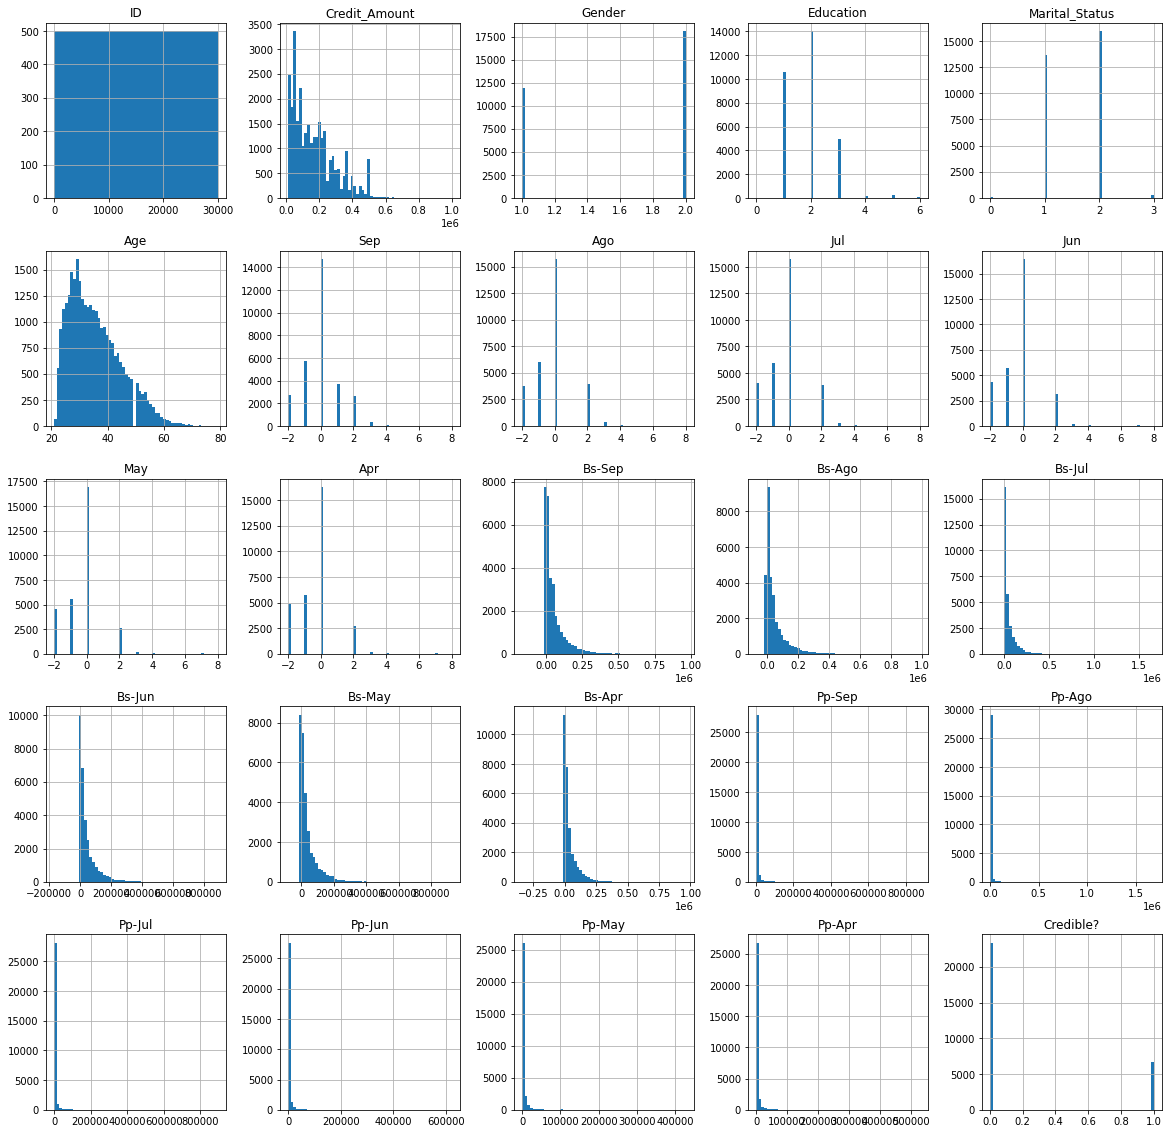

In [11]:
data.hist(bins = 60, figsize=(20,20))#graficar los histogramas de las variables sirven para identificar que 
#tipo de variable son 

In [18]:
numericas = ['Credit_Amount', 'Age', 'Bs-Sep','Bs-Ago','Bs-Jul','Bs-Jun','Bs-May','Bs-Apr','Pp-Sep','Pp-Ago','Pp-Jul','Pp-Jun','Pp-May','Pp-Apr']
cat_ord_bin = ['Education', 'Marital_Status', 'Gender','Sep','Ago','Jul','Jun','May','Apr','Credible?']

In [36]:
data_copy = data.copy()
for label in numericas: #imputamos las variables numericas con la media 
  data_copy[label].fillna(data_copy[label].mean(), inplace = True) 

for label in cat_ord_bin: #imputamos el resto de las variables que son categoricas, ordinales y binarias con la moda
  data_copy[label].fillna(data_copy[label].mode()[0], inplace = True) 

print(data_copy.isnull().any())#aqui confirmamos que no ya no existan valores nulos 


ID                False
Credit_Amount     False
Gender            False
Education         False
Marital_Status    False
Age               False
Sep               False
Ago               False
Jul               False
Jun               False
May               False
Apr               False
Bs-Sep            False
Bs-Ago            False
Bs-Jul            False
Bs-Jun            False
Bs-May            False
Bs-Apr            False
Pp-Sep            False
Pp-Ago            False
Pp-Jul            False
Pp-Jun            False
Pp-May            False
Pp-Apr            False
Credible?         False
dtype: bool


In [38]:
data_copy.isnull().sum().sum()

0

### 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [39]:
data_copy.describe()

,ID,Credit_Amount,Gender,Education,Marital_Status,Age,Sep,Ago,Jul,Jun,...,Bs-Jun,Bs-May,Bs-Apr,Pp-Sep,Pp-Ago,Pp-Jul,Pp-Jun,Pp-May,Pp-Apr,Credible?
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603767,1.853067,1.551933,35.484214,-0.016633,-0.133667,-0.166367,-0.220733,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221167
std,8660.398374,129747.661567,0.489122,0.790294,0.521963,9.217256,1.123773,1.197155,1.195911,1.168983,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415039
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Esta función nos ayuda a visualizar los datos estadísticos de nuestras variables. 

Podemos observar cuandos registros hay de cada dato, (como podemos ver en todos son 30,000 porque ya hicimos la limpieza de los registros nulos).

Respecto a medidas de tendencia central, también nos arroja la media (promedio) de cada variable. Esta función nos arroja la media sin importar si se trata de variables categóricas o numéricas, por lo que podemos ver que por ejemplo la variable "Gender" nos da 1.603, lo cual quiere decir que si 1=hombre y 2=mujer, hay un poco más de clientes mujeres que de hombres. 

También nos arroja valores estadísticos de dispersión, como la desviación estándar, sus valores mínimos y máximos y su rango intercuartil. 
Por ejemplo podemos ver que en las variables numéricas como Credit_Amount, los datos estan muy dispersos (std), lo que significa que el credito que se les da a cada cliente ha sido muy diferente. Por otro lado, en las variables como "Gender" y "Marital_Status", la dispersión es menor, ya que como dijimos para "Gender" solo hay dos valores y para "Marital_Status" solo tres, por lo que la desviación va a ser muy pequeña. 

También podemos observar como para la variable del crédito, su valor mínimo es de 10,000 dolares, que es lo mínimo que el banco le ha dado a uno de los clientes de este conjunto de datos, mientras que el mayor crédito que ha dado ha sido de un millón de dolares.  

### 5. Realiza el conteo de las variables categóricas

Las variables categóricas unicamente son tres como tal, hay una variable binaria (solo valores de 0 y 1) que es justamente la variable de salida y seis variables ordinales, que son las referentes al estado de reembolso de cada mes (de abril a septiembre), ya que estas indican el retraso del pago (1: un mes de retraso, 2: dos meses de retraso, etc). Estas variables son mejor clasificadas como ordinales porque denotan un orden y no simplemente una clasificación. 

In [40]:
categoricas = ['Education', 'Marital_Status', 'Gender']
print(len(categoricas)) #3 variables categoricas 

3


###6. Escala los datos, si consideras necesario

El escalamiento de datos de las variables numéricas ayuda a que sea más fácil analizar los patrones y las tendencias de las columnas en un dataframe, ademas de esta forma, todas las variables tienen el mismo peso en la predicción, ya que si no estan escaladas, las variables que tengan datos con más digitos, tendrían más peso. 

La técnica de estandarización de Sklearn: StandardScaler es una buena técnica cuando hay valores atípicos en un dataset, pero debido a que en el paso 4 ya imputados dichos valores, utilizaremos la otra ténica de Sklearn: MixMaxScaler, donde los valores se escalan en un rango de 0 a 1. 

In [47]:
data_copy.drop(['ID','Gender','Education','Marital_Status', 'Sep','Ago','Jul','Jun','May','Apr','Credible?'], axis=1, inplace=True)

In [48]:
scaler = MinMaxScaler()

scaled = scaler.fit_transform(data_copy)
scaled_numericas = pd.DataFrame(scaled, columns=data_copy.columns)
scaled_numericas.head()

,Credit_Amount,Age,Bs-Sep,Bs-Ago,Bs-Jul,Bs-Jun,Bs-May,Bs-Apr,Pp-Sep,Pp-Ago,Pp-Jul,Pp-Jun,Pp-May,Pp-Apr
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


###7. Reduce las dimensiones con PCA, si consideras necesario.

In [50]:
pcs = PCA()

pcs_t = pcs.fit_transform(scaled_numericas)
pcs_t[:5]

array([[-2.62116456e-01, -2.71572722e-02,  2.81092455e-02,
        -1.05503252e-03,  7.55576329e-04, -3.09540045e-04,
        -1.02878014e-04, -6.31167344e-04,  6.96132731e-04,
        -3.77650223e-05,  4.04521082e-04,  3.97967673e-04,
         3.43016157e-04,  6.17283875e-04],
       [-1.88357660e-01,  6.43951377e-03, -4.12783891e-02,
        -5.52325777e-03, -3.54532305e-03,  2.12567931e-03,
        -2.32883692e-03, -3.17875091e-03, -2.00310157e-04,
        -1.36497441e-04, -2.92900522e-04,  7.42220460e-04,
        -2.80423023e-04, -9.04627268e-05],
       [-7.67187531e-02, -6.46359761e-02,  1.66044426e-02,
        -1.53961839e-03,  4.29576244e-03,  3.34686595e-03,
        -1.92914103e-04, -6.52804963e-03,  3.28508812e-03,
        -4.55969182e-04,  4.96137105e-03, -5.17001047e-03,
        -1.22604524e-03, -4.16865019e-04],
       [-3.65465984e-02, -8.52813259e-02,  8.13708277e-02,
        -5.24743805e-03,  6.53252115e-03, -4.47500671e-03,
         2.22463000e-03,  4.30986624e-04, -2.

7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [51]:
pcsSummary_df = pd.DataFrame({ '%desviación estándar': np.sqrt(pcs.explained_variance_),
                             '% varianza individual': np.round(pcs.explained_variance_ratio_,5) * 100,
                            '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100 })
pcsSummary_df 

,%desviación estándar,% varianza individual,% varianza acumulada
0,0.165442,41.427,41.426509
1,0.145278,31.944,73.370444
2,0.109858,18.266,91.636761
3,0.036786,2.048,93.684917
4,0.033711,1.720,95.404915
5,0.031934,1.543,96.948327
6,0.024798,0.931,97.879085
7,0.020991,0.667,98.545955
8,0.018757,0.532,99.078446
9,0.015610,0.369,99.447241


In [53]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_numericas.columns))] 
pcsSummary_df.index = pcs_labels
pcsSummary_df #damos nombre a los componentes principales 

,%desviación estándar,% varianza individual,% varianza acumulada
PC1,0.165442,41.427,41.426509
PC2,0.145278,31.944,73.370444
PC3,0.109858,18.266,91.636761
PC4,0.036786,2.048,93.684917
PC5,0.033711,1.720,95.404915
PC6,0.031934,1.543,96.948327
PC7,0.024798,0.931,97.879085
PC8,0.020991,0.667,98.545955
PC9,0.018757,0.532,99.078446
PC10,0.015610,0.369,99.447241


Los componentes de un PCA son información proveniente de las variables numéricas del conjunto de datos, y se crean la misma cantidad de componentes que de variables numéricas. El PCA mantiene casi el 100% de la información original solo que distribuida de manera distinta, con el objetivo de utilizar menos componentes principales que de variables para explicar el mismo porcentaje de varianza. 

En este conjunto de datos podemos ver que para mantener un 95% de varianza en el conjunto de datos, simplemente necesitamos los primeros 5 componentes, es decir los 5 componentes mas principales. 

7.2 Indica la importancia de las variables en cada componente

In [55]:
pd.DataFrame({ #usamos los variables escaladas 
    "%Varianza": (scaled_numericas.var()/ (scaled_numericas.var().sum())) * 100,
    "%Varianza Acumulado": (scaled_numericas.var().cumsum() /(scaled_numericas.var().sum())) *100 })

,%Varianza,%Varianza Acumulado
Credit_Amount,25.996633,25.996633
Age,38.223965,64.220598
Bs-Sep,6.425271,70.645869
Bs-Ago,6.904717,77.550585
Bs-Jul,2.194022,79.744607
Bs-Jun,5.557727,85.302334
Bs-May,5.499661,90.801995
Bs-Apr,3.169854,93.971849
Pp-Sep,0.544044,94.515894
Pp-Ago,0.283245,94.799139


Aqui podemos confirmar que para explicar el mismo porcentaje de varianza, se necesitan mucho menos componentes principales que variables. Por ejemplo, para explicar el 95% necesitamos 5 componentes, mientras que variables necesitaríamos 11. 

In [57]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
componentes_df = pd.DataFrame(pcs.components_.round(3), columns=pcs_df.columns, index=scaled_numericas.columns)
componentes_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Credit_Amount,0.437,0.825,0.165,0.171,0.096,0.155,0.152,0.113,0.018,0.011,0.019,0.023,0.034,0.031
Age,0.501,-0.554,0.302,0.318,0.178,0.289,0.285,0.211,0.029,0.017,0.030,0.036,0.052,0.049
Bs-Sep,-0.742,0.111,0.306,0.331,0.181,0.287,0.278,0.203,0.002,-0.003,-0.002,-0.006,-0.016,-0.017
Bs-Ago,-0.078,0.006,-0.193,-0.177,-0.021,0.027,0.095,0.240,0.097,0.093,0.140,0.214,0.816,0.328
Bs-Jul,-0.022,-0.001,0.424,0.329,0.041,-0.227,-0.429,-0.332,0.028,-0.031,-0.095,-0.124,0.149,0.562
Bs-Jun,-0.026,0.003,-0.229,-0.161,-0.012,0.155,0.260,-0.026,0.092,0.064,0.141,0.197,-0.500,0.712
Bs-May,-0.015,0.000,0.231,0.106,-0.106,-0.395,0.074,-0.020,0.054,-0.030,-0.017,0.855,-0.084,-0.141
Bs-Apr,-0.015,-0.000,-0.205,0.276,0.105,0.138,-0.197,-0.232,0.712,0.223,0.406,0.048,-0.018,-0.187
Pp-Sep,-0.011,-0.000,0.366,-0.225,-0.246,0.194,-0.099,-0.136,-0.322,-0.031,0.762,0.019,0.004,-0.058
Pp-Ago,-0.004,-0.000,0.088,-0.271,0.534,0.187,-0.128,-0.259,-0.245,0.626,-0.148,0.193,0.018,-0.063


In [58]:
componentes_df.iloc[:,:14].abs().idxmax()

PC1            Bs-Sep
PC2     Credit_Amount
PC3            Bs-Jul
PC4            Pp-Jun
PC5            Pp-Apr
PC6            Pp-Jul
PC7            Pp-May
PC8            Pp-May
PC9            Bs-Apr
PC10           Pp-Ago
PC11           Pp-Sep
PC12           Bs-May
PC13           Bs-Ago
PC14           Bs-Jun
dtype: object

En estas dos ultimas celdas podemos observar la importancia que tiene cada variable en cada componente. Por ejemplo para el primer componente, la variable que mayor aportación tiene es Bs-Sep, con un valor de -0.742

###8. Elabora los histogramas de los atributos para visualizar su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb543d3b4d0>,
      dtype=object)

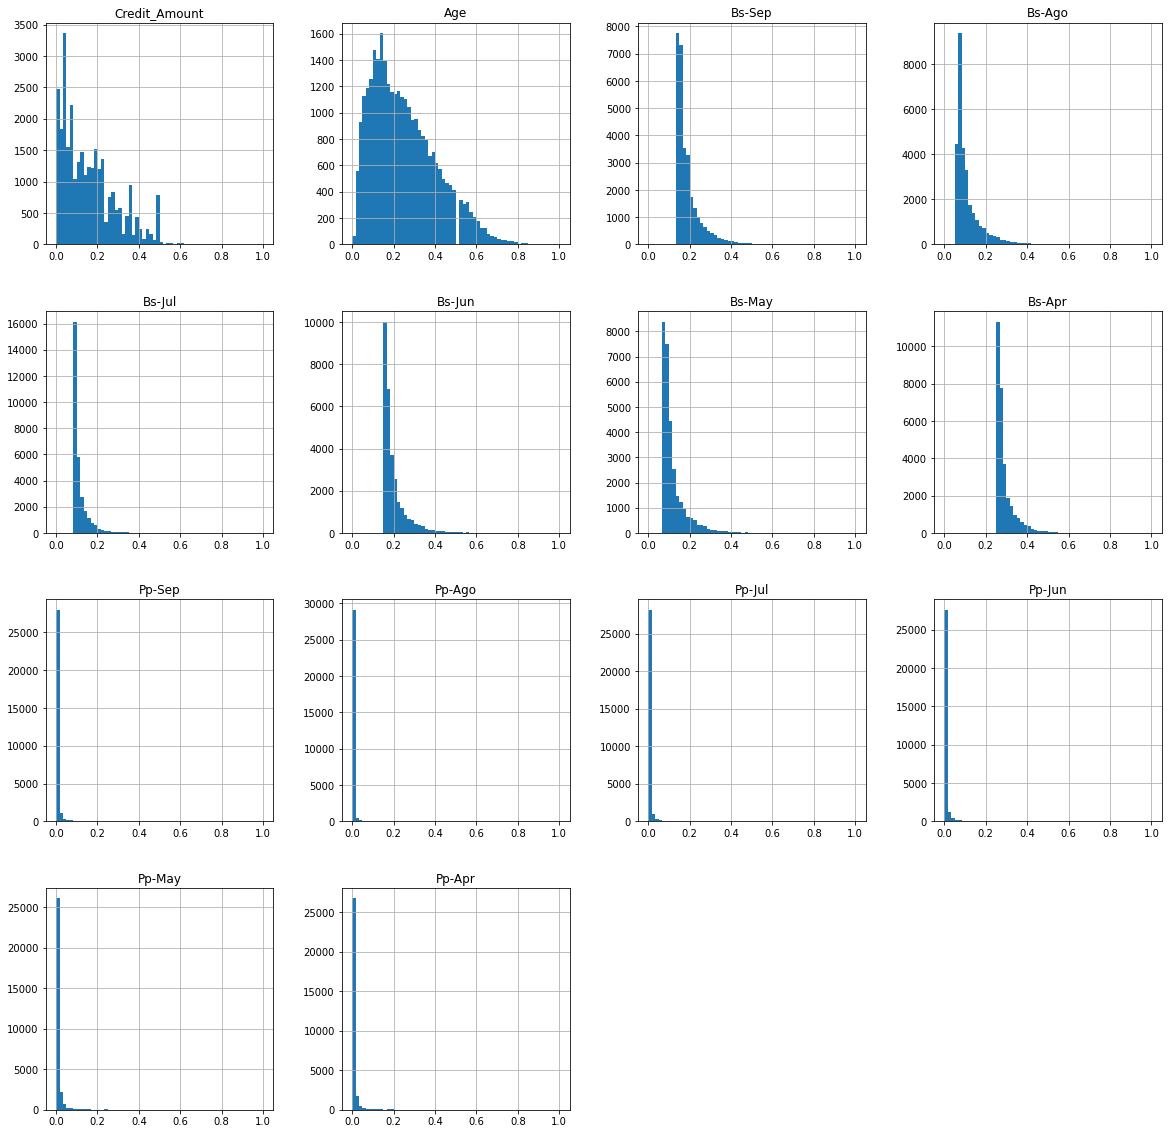

In [59]:
scaled_numericas.hist(bins = 60, figsize=(20,20))

###9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

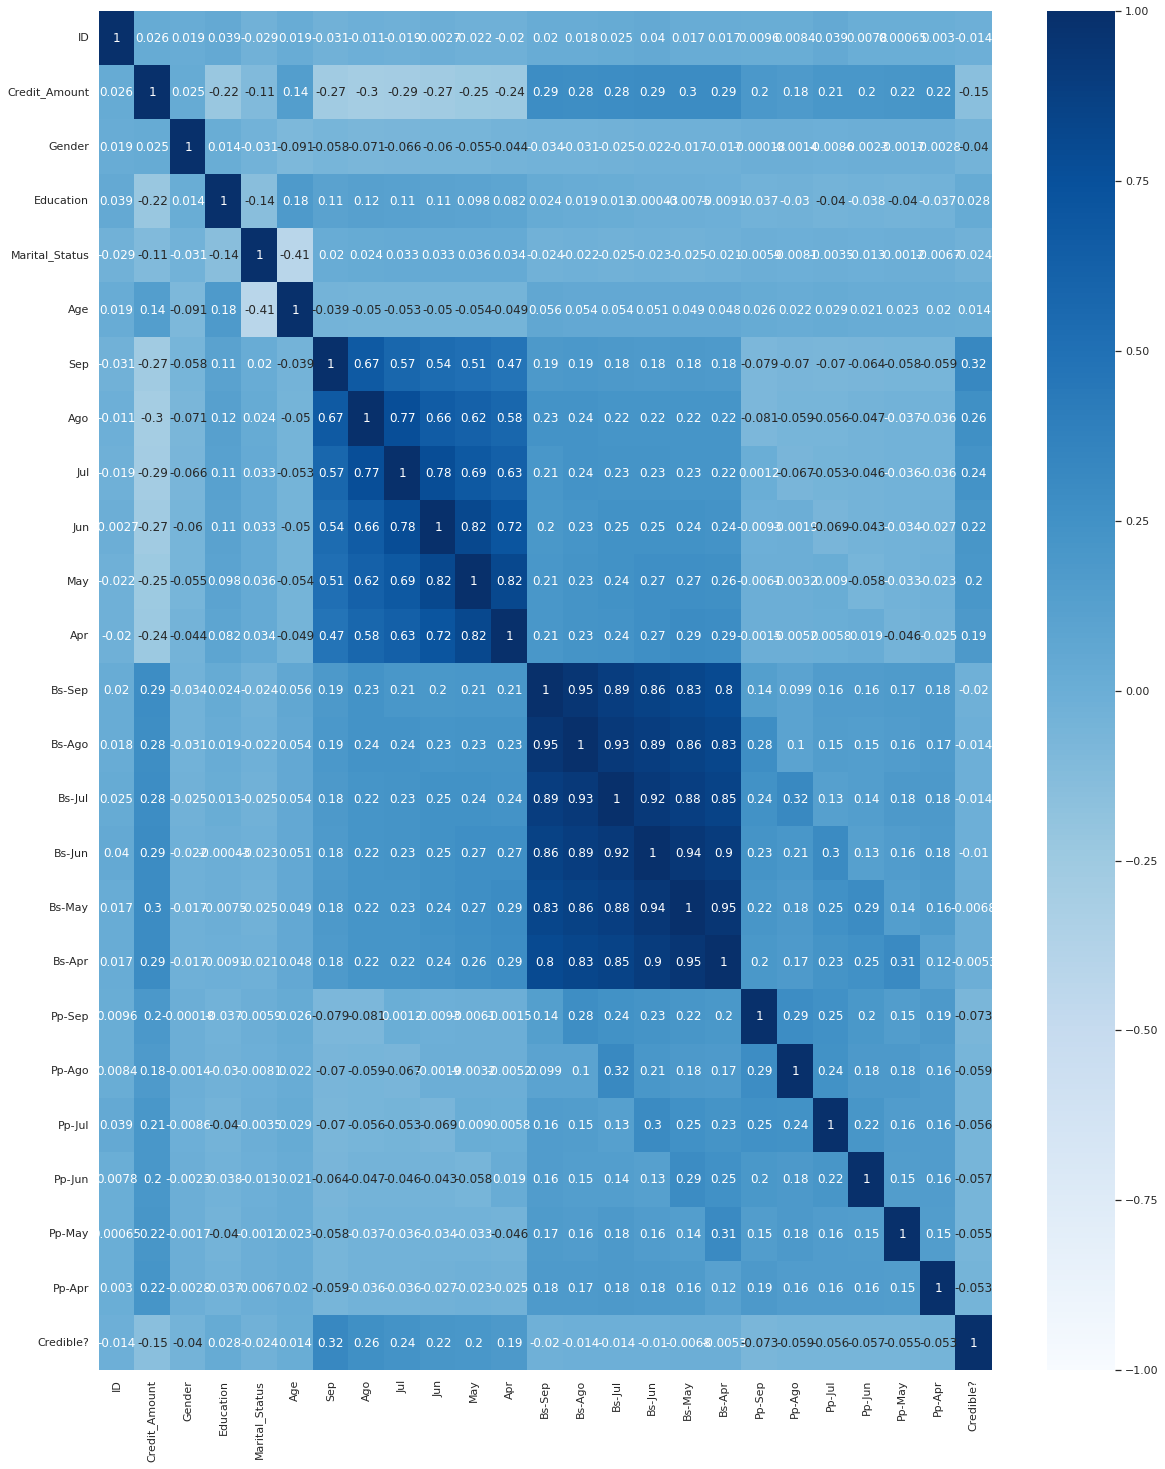

In [62]:
import seaborn as sns 
data.corr()
corrs = data.corr()
sns.set(rc = {'figure.figsize':(20,25)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "Blues", annot= True)

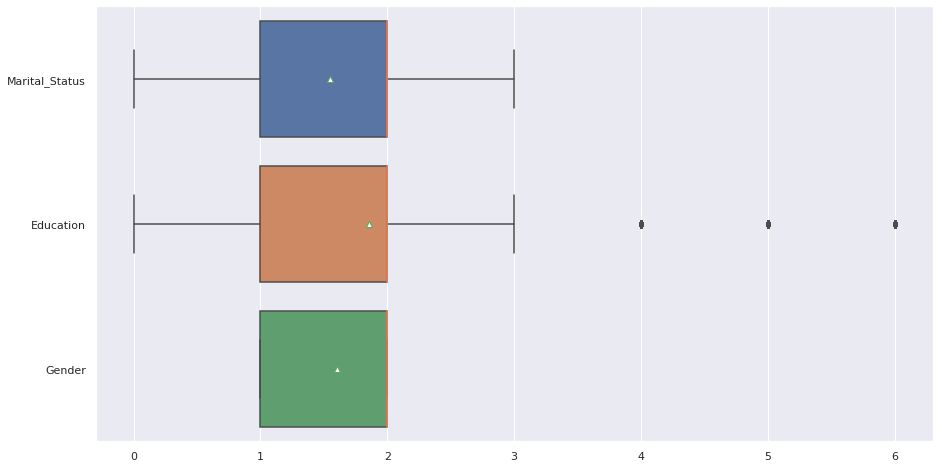

In [92]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data=data[['Marital_Status', 'Education','Gender']], orient="h", showmeans=True, 
            medianprops={"color": "coral"}, meanprops={"markerfacecolor":"white"})

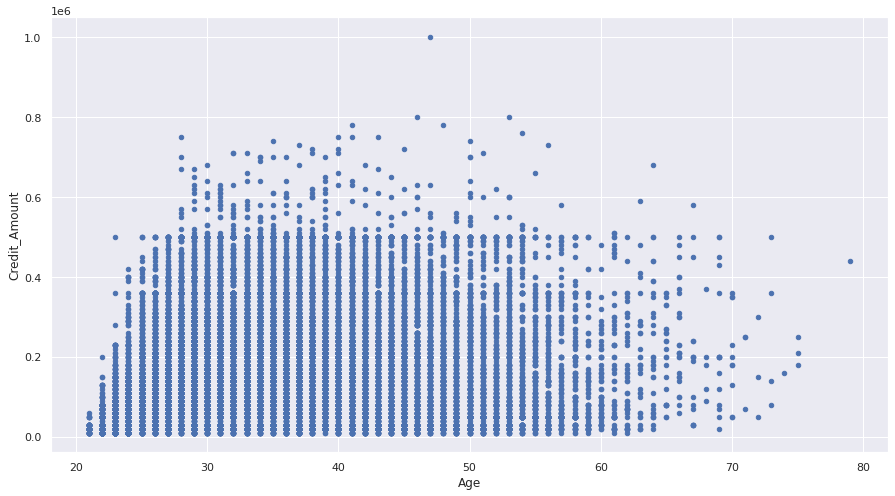

In [102]:
data.plot.scatter(x = 'Age', y = 'Credit_Amount')
plt.show()

###10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

1. El mapa de calor nos indica la correlación que hay entre cada una de las variables. Ahí podemos apreciar por ejemplo, que las variables que mayor correlación tienen con la variable de salida son las variables que indican el historial del estado de pago, las cuales son las variables de Sep a Abril. Esto nos dice que estas variables en realidad son las que mayor aportación e importancia tienen a la hora de decidir si a un cliente se le da un crédito o no. 

2. La gráfica BoxPlot nos indica la varianza de las variables categóricas como Education, Marital_Status y Gender. Education solo tiene valores de 1 a 4, sin embargo gracias a esta gráfica pudimos darnos cuenta que tiene outliers en el valor 5 y 6, lo que nos indica que probablemente el conjunto de datos no este del todo correcto y allá valores fuera del rango, ya se por error al recolectar los datos, etc. Por otro lado, esta gráfica es muy versátil y nos muestra también la media y la mediana, y también se puede utilizar obviamentepara mostrar las variables numéricas. 

3. La grafica de Scatter nos ayuda a visualizar la relación entre dos variables. Por ejemplo en esta podemos ver la relación que tiene el monto de crédito de las personas con su edad y así podemos observar si el banco por ejemplo le da importancia a la edad que tenga el cliente, o se basa en otros aspectos. Aquí podemos ver que en efecto se basa en otros aspectos pues no hay un patrón bastante notorio, unicamente podemos decir que a jovenes entre 20 a 25 años no dan un credito muy alto. 

Referencias: 

1. ¿Cómo escalar las columnas de Pandas DataFrame? – Acervo Lima. (s. f.). Recuperado 1 de noviembre de 2022, de https://es.acervolima.com/como-escalar-las-columnas-de-pandas-dataframe/

2. Brownlee, J. (2020, 10 junio). How to Use StandardScaler and MinMaxScaler Transforms in Python. Machine Learning Mastery. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

3. seaborn.boxplot — seaborn 0.12.1 documentation. (s. f.). Recuperado 1 de noviembre de 2022, de https://seaborn.pydata.org/generated/seaborn.boxplot.html